# Adversarial training: binned data differences



In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

### Here is some pseudo-data of a variable, pt:

In [3]:
pt = np.array([50, 50, 100, 101, 102, 103, 104, 200, 201, 202, 203, 300, 301, 302], dtype="float")

### Here is the bins that the measurements occur in: 

In [4]:
bins = np.array([0,100,200,300,400], dtype="float")

In [5]:
bins

array([  0., 100., 200., 300., 400.])

### First we digitize the values of pt in the bins to find the categories

We have to offset the bin boundaries by one to get the index in the array. 

In [6]:
categories = np.digitize(pt, bins=bins) - 1

In [7]:
categories

array([0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3])

### Next make a histogram of the pseudodata: 

In [8]:
n, xbins = np.histogram(pt, bins=bins)

### Now get the "observed" values (called "hepdata"): 

In [9]:
hepdata = np.array([0, 3, 2, 1], dtype="float")

In [10]:
hepdata = hepdata / np.sum(hepdata)

In [11]:
n = n / np.sum(n)

### Plot the two distributions

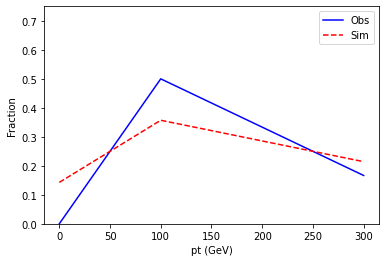

In [12]:
plt.plot(bins[:-1], hepdata, '-b', label="Obs")
plt.plot(bins[:-1], n, '--r', label='Sim')
plt.ylim(0,0.75)
plt.xlabel("pt (GeV)")
plt.ylabel("Fraction")
plt.legend()

### The weights are the difference between the histograms: 

In [13]:
weights = hepdata - n

In [14]:
weights

array([-0.14285714,  0.14285714,  0.04761905, -0.04761905])

### Plot the weight

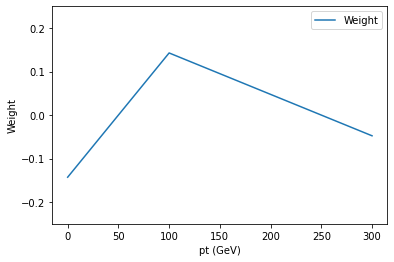

In [15]:
plt.plot(bins[:-1], weights, '-', label="Weight")
plt.ylim(-0.25, 0.25)
plt.xlabel("pt (GeV)")
plt.ylabel("Weight")
plt.legend()

### Then you broadcast the weights to each event based on the category

In [16]:
weights[categories]

array([-0.14285714, -0.14285714,  0.14285714,  0.14285714,  0.14285714,
        0.14285714,  0.14285714,  0.04761905,  0.04761905,  0.04761905,
        0.04761905, -0.04761905, -0.04761905, -0.04761905])